# Exploratory Data Anaylsis on Haberman Dataset 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
    

### Haberman's Survival Data Set

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical)  -->lymph node in the area of the armpit (axilla) to which cancer has spread.This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
4. Survival status (class attribute) 
          -- 1 = the patient survived 5 years or longer 
          -- 2 = the patient died within 5 year


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Haberman.csv into a pandas dataFrame.
hab = pd.read_csv("haberman.csv")

In [5]:
print(hab.shape)

(306, 4)


In [7]:
hab.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


 Observations:

1. There are 4 columns in the dataset Age, Year, nodes and status
2. 306 rows and 4 columns are present in dataset
3. All columns have int values(No Null columns in Dataset)


In [6]:
hab.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:

1. Operational Age of Patient is between 30 yrs to 83 yrs.
2. Avg Age of Patient is 52 yrs.
3. Max positive axillary node detected is 52.
4. 25% patients have 0 positive axillary node ,50% patients have only 1 positive axillary node and 75% of total patients have     positive axillary node.


In [9]:
hab["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [10]:
hab["status"].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: status, dtype: float64

Observations:

1. 73.5% patient survived 5 years or longer.
2. 26.4% patient died within 5 years.

### 2-D Scatter Plot

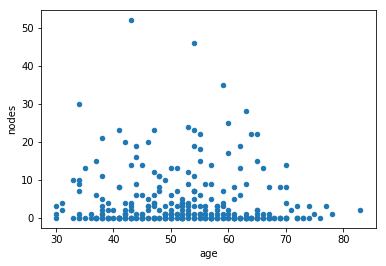

In [12]:
hab.plot(kind="scatter",x='age',y='nodes' );
plt.show()


 Observations:

1. The data cannot be easily seperated.
2. Status 1 have more number of patient as compared to Status 2
3. Most of the patients lie upto 30 nodes.
4. Nodes are high in age between 40 to 60.
5. Inbalanced Dataset 

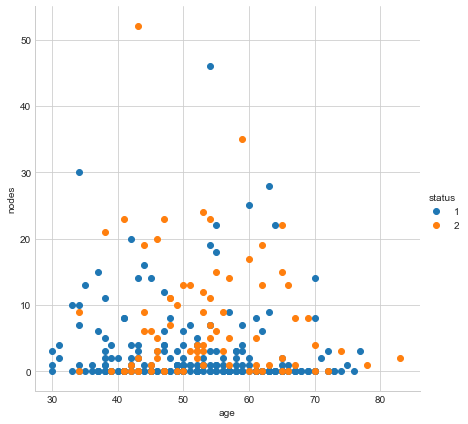

In [14]:
# 2-D Scatter plot with color-coding for each status
sns.set_style('whitegrid');
sns.FacetGrid(hab,hue="status",size=6)\
    .map(plt.scatter,'age','nodes')\
    .add_legend();
plt.show();



Observations:

1. Graph between Age and Nodes
2. Overlapped the points, Separation is difficult
3. We can't say anythng about survival from above graph.


### Pair Plots

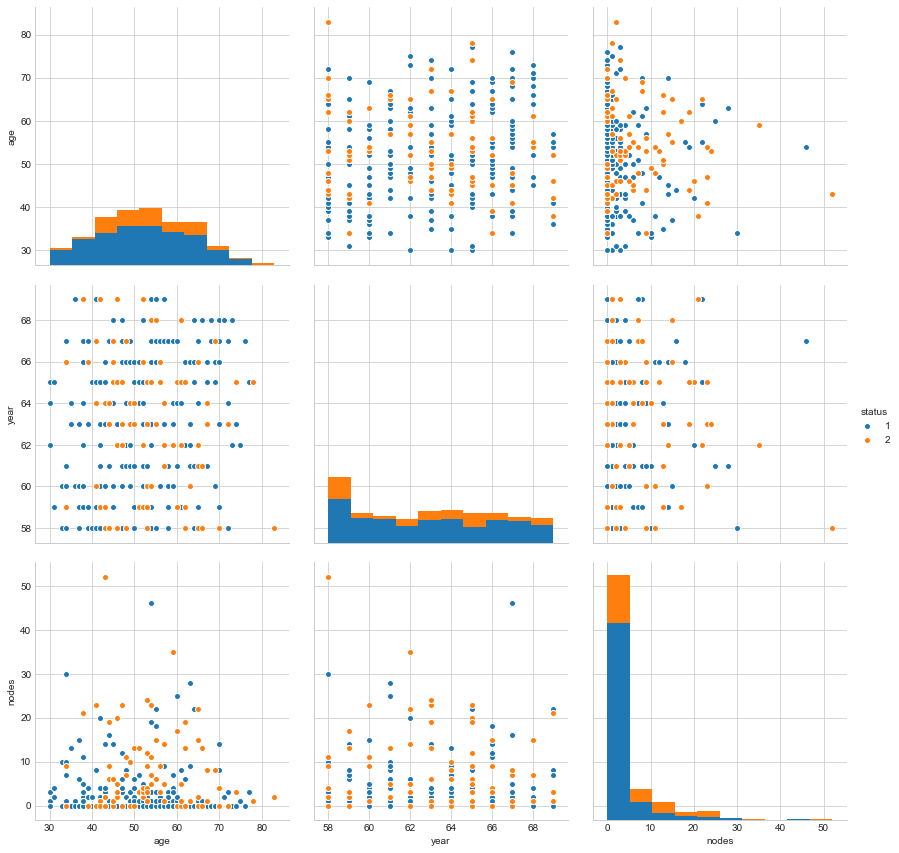

In [18]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(hab,hue ="status",size=4,vars=['age','year','nodes'])
plt.show()

Observations:

1. The Patients having age between 38 to 70 died mostly within 5 years.
2. We can't Separate the datapoints in pair plots too.

### Histogram, PDF, CDF


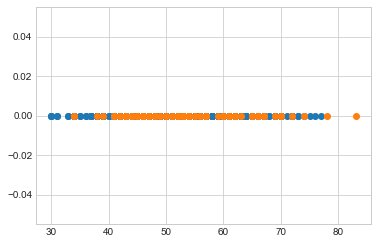

In [19]:
import numpy as np
hab_st1 = hab.loc[hab['status']==1];
hab_st2 = hab.loc[hab['status']==2];


plt.plot(hab_st1['age'],np.zeros_like(hab_st1['age']),'o')
plt.plot(hab_st2['age'],np.zeros_like(hab_st2['age']),'o')
plt.show();

Observations:

1. Data Points are overlapped.
2. We can't say about status 1 and 2 using 1-D scatter plot.

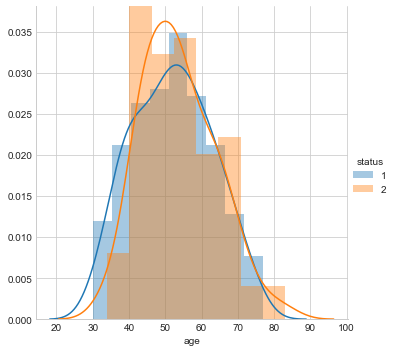

In [21]:
sns.FacetGrid(hab,hue='status',size=5)\
    .map(sns.distplot,"age")\
    .add_legend();
plt.show();

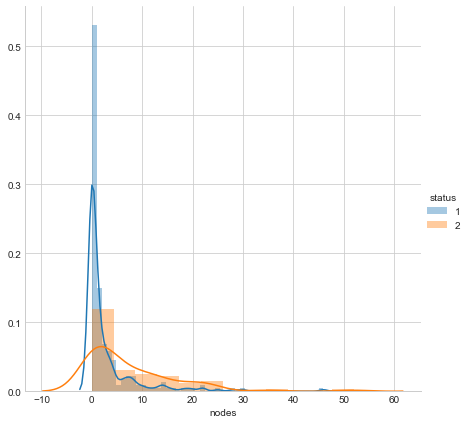

In [23]:
sns.FacetGrid(hab,hue='status',size=6)\
    .map(sns.distplot,"nodes")\
    .add_legend();
plt.show();

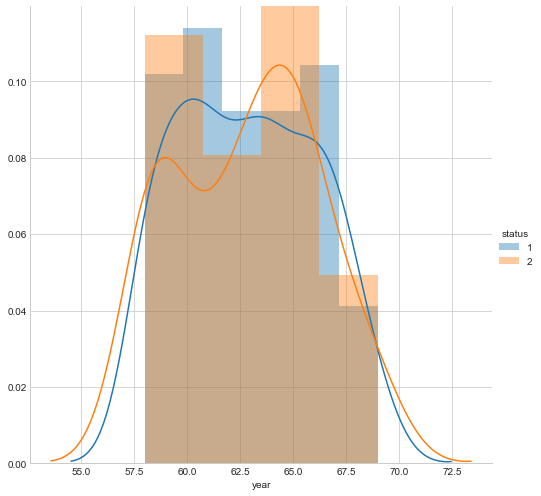

In [25]:
sns.FacetGrid(hab,hue='status',size=7)\
    .map(sns.distplot,"year")\
    .add_legend();
plt.show();

Observations:

1. From the Node distplot, we say that the patients who survive more than 5 yrs have positive nodes close to 0
  as compared to patients died in 5 yrs.
2. Age and Year distplot shows the similar behaviour for the status.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


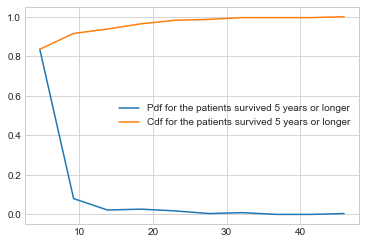

In [42]:
counts, bin_edges = np.histogram(hab_st1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients survived 5 years or longer',
            'Cdf for the patients survived 5 years or longer'])

plt.show();

[0.60493827 0.16049383 0.12345679 0.08641975 0.         0.01234568
 0.         0.01234568]
[ 0.   6.5 13.  19.5 26.  32.5 39.  45.5 52. ]


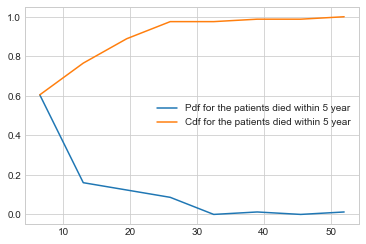

In [43]:
counts,bin_edges = np.histogram(hab_st2['nodes'],bins =8,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

CDF = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],CDF)
plt.legend(['Pdf for the patients died within 5 year',
            'Cdf for the patients died within 5 year'])

plt.show()

### Mean, Variance and Std-dev

In [47]:
print("Means:")
print(np.mean(hab_st1["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(hab_st1["nodes"],50)));
print(np.mean(hab_st2["nodes"]))


print("\nStd-dev:");
print(np.std(hab_st1["nodes"]))
print(np.std(hab_st2["nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


In [49]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hab_st1["nodes"]))
#Median with an outlier
print(np.median(np.append(hab_st1["nodes"],50)));
print(np.median(hab_st2["nodes"]))


print("\nQuantiles:")
print(np.percentile(hab_st1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(hab_st2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hab_st1["nodes"],90))
print(np.percentile(hab_st2["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hab_st1["nodes"]))
print(robust.mad(hab_st2["nodes"]))






Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Box plot and Whiskers

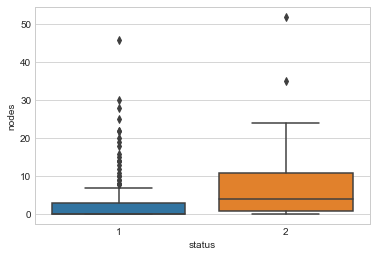

In [50]:
sns.boxplot(x='status',y='nodes', data=hab)
plt.show()

### Violin plots

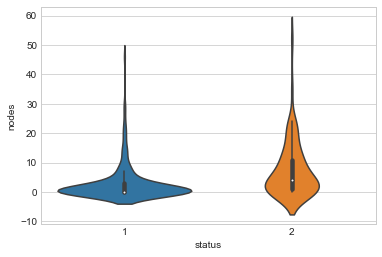

In [51]:
sns.violinplot(x='status',y='nodes', data=hab, size=8)
plt.show()

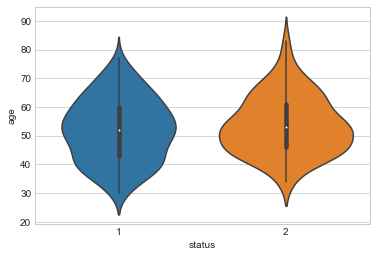

In [52]:
sns.violinplot(x='status',y='age', data=hab, size=8)
plt.show()

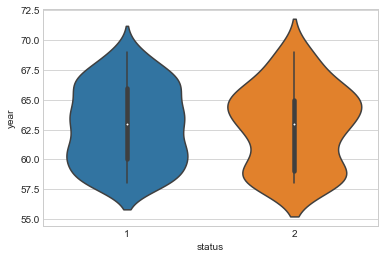

In [53]:
sns.violinplot(x='status',y='year', data=hab, size=8)
plt.show()

Observations:

1. The patient survived 5 years or longer in year approx 1960 to 1966 having age between 41-60
2. The patient died within 5 year in year approx 1958 to 1965 having age between 44-62.


## Conclusions

1. The dataset contains 306 rows and 4 columns, having 0 NULL Values.
2. The dataset is a inbalanced dataset because it contains 225 datapoints of status 1 and only 81 of status 2.
3. Average Age of Patient is 52 yrs.
4. 50% patients have only 1 positive axillary node.
5. 73.5% patient survived 5 years or longer and 26.4% patient died within 5 years.
6. We can't differentiate the whole bunch of status using 2-D Scatter Plot and Pair Plots.
7. Nodes and Age column in Pair Plot give some valuable insghts about the Patients.
8. PDF, CDF Distplot states that, those patients having nodes close to 0 have survive more than 5 yrs as compared to patient        died in 5 yrs.
9. From Box Plot and Violin Plot, we infer that patient survived 5 years or longer have nodes between 0 to 5 and age between 41    to 60 in year 1960 to 1966.
